In [ ]:
!pip install tushare

In [3]:
import numpy as np
import pandas as pd
import tushare as ts
from utils import *
print(ts.__version__)

/root/yzs/mniconda3/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


1.2.84


In [4]:
ts.set_token('1f2f092156dfe775a88e478f3a54565e0adab29246c83814e95fa0dd')

In [5]:
pro = ts.pro_api()

# 股票列表数据
- 包括上市和退市股票
- 在数据集的时间之后上市的也要去掉，可以保留在数据集期间上市的股票
- tushare接口已经退市的股票没有历史数据，因此无法考虑退市因素，只能把这部分股票去掉

In [7]:
# 主板有125支退市的(只有一支暂停上市)，总共有147支退市的， eg. 000003 PT金田
# 市场类别 （主板/创业板/科创板/CDR/北交所）
stock_list = pro.stock_basic(market='主板', list_status='L',fields='ts_code,symbol,name,area,industry,exchange,list_date')  
stock_delist = pro.stock_basic(market='主板', list_status='D',fields='ts_code,symbol,name,area,industry,exchange,list_date,delist_date,list_status')  

In [8]:
print(stock_list.shape, stock_delist.shape)
print(stock_list.columns)
stock_list.head()

(2139, 7) (125, 9)
Index(['ts_code', 'symbol', 'name', 'area', 'industry', 'exchange',
       'list_date'],
      dtype='object')


,ts_code,symbol,name,area,industry,exchange,list_date
0,000001.SZ,000001,平安银行,深圳,银行,SZSE,19910403
1,000002.SZ,000002,万科A,深圳,全国地产,SZSE,19910129
2,000004.SZ,000004,国华网安,深圳,软件服务,SZSE,19910114
3,000005.SZ,000005,ST星源,深圳,环境保护,SZSE,19901210
4,000006.SZ,000006,深振业A,深圳,区域地产,SZSE,19920427


In [26]:
stock_list.to_csv("./data/stock_main_list_2139_9.csv")
stock_delist.to_csv("./data/stock_main_delist_125_9.csv")

In [56]:
delist = pd.read_csv("./data/stock_main_delist_125_9.csv")
delist = delist[delist["delist_date"].between(20190630, 20220301)]
print(delist.shape)
# 26支，只有一支退市在19年下半年(testset),有一支在11年上市(trainset)

with open("./data/stock_delistadtertrain_26.txt", 'w') as f:
    for code in delist['ts_code'].values.tolist():
        f.write(code+"\n")
        
delist

(26, 10)


,Unnamed: 0,ts_code,symbol,name,area,industry,exchange,list_status,list_date,delist_date
3,3,000018.SZ,18,神城A退(退),NaN,NaN,SZSE,D,19920616,20200107
32,32,000662.SZ,662,天夏退(退),NaN,NaN,SZSE,D,19961216,20210412
35,35,000693.SZ,693,华泽退(退),NaN,NaN,SZSE,D,19970226,20190709
39,39,000760.SZ,760,斯太退(退),NaN,NaN,SZSE,D,19970627,20210723
43,43,000780.SZ,780,ST平能(退),NaN,NaN,SZSE,D,19970606,20220124
51,51,000939.SZ,939,凯迪退(退),NaN,NaN,SZSE,D,19990923,20201217
59,59,600068.SH,600068,葛洲坝(退),NaN,NaN,SSE,D,19970526,20210913
60,60,600069.SH,600069,退银鸽(退),NaN,NaN,SSE,D,19970430,20200827
61,61,600074.SH,600074,退保千(退),NaN,NaN,SSE,D,19970623,20200602
62,62,600086.SH,600086,退金钰(退),NaN,NaN,SSE,D,19970606,20210317


In [12]:
slist = pd.read_csv("./data/stock_main_list_2139_9.csv")
test_slist = slist[slist["list_date"].between(20190630, 20191231)]
print(test_slist.shape)
# 604支在(trainset)上市，29支在(validset)上市，26支在(testset)上市
print(test_slist['ts_code'].values.tolist())

#with open("./data/stock_listintest_26.txt", 'w') as f:
#    for code in test_slist['ts_code'].values.tolist():
#        f.write(code+"\n")

(26, 10)
['601077.SH', '601236.SH', '601512.SH', '601658.SH', '601916.SH', '603053.SH', '603093.SH', '603109.SH', '603115.SH', '603236.SH', '603256.SH', '603279.SH', '603390.SH', '603489.SH', '603530.SH', '603610.SH', '603613.SH', '603662.SH', '603687.SH', '603755.SH', '603786.SH', '603815.SH', '603927.SH', '603983.SH', '603992.SH', '603995.SH']


In [15]:
slist = slist[slist['list_date'] < 20191231]
stock_codes = slist['ts_code'].values.tolist()
print(len(stock_codes))  # 1931
stock_codes.sort()
with open("./data/stock_codes_1931.txt", 'w') as f:
    for code in stock_codes:
        f.write(code+"\n")

1931


In [22]:
slist = slist[slist['list_date'] < 20091120]
stock_codes = slist['ts_code'].values.tolist()
print(len(stock_codes))  # 1271
stock_codes.sort()
with open("./data/stock_codes_1271.txt", 'w') as f:
    for code in stock_codes:
        f.write(code+"\n")

1271


# 交易日历
- 已经存好一份2019年开始的了

In [28]:
import pandas as pd
trading_day = pd.read_csv("./data/trading_day_20091009_20211214.csv")

In [29]:
print(trading_day.shape)
print(trading_day.columns)
trading_day.head()

(4450, 5)
Index(['Unnamed: 0', 'exchange', 'cal_date', 'is_open', 'pretrade_date'], dtype='object')


,Unnamed: 0,exchange,cal_date,is_open,pretrade_date
0,0,SSE,20091009,1,20090930
1,1,SSE,20091010,0,20091009
2,2,SSE,20091011,0,20091009
3,3,SSE,20091012,1,20091009
4,4,SSE,20091013,1,20091012


In [32]:
open_day = trading_day[trading_day['is_open']==1]
print(open_day.shape)
open_day = open_day[open_day['cal_date'].between(20100101,20191231)]  # between: [left, right]
print(open_day.shape)

(2964, 5)
(2431, 5)


In [33]:
open_day['cal_date'].to_csv("./data/trading_opendays_2431.txt", header=None, index=None, sep=' ')

# 股价数据
- 有未复权和复权两个版本，通过改adj参数控制
- 未复权的股价骤增骤减，没有趋势，应该还是尽量用复权数据
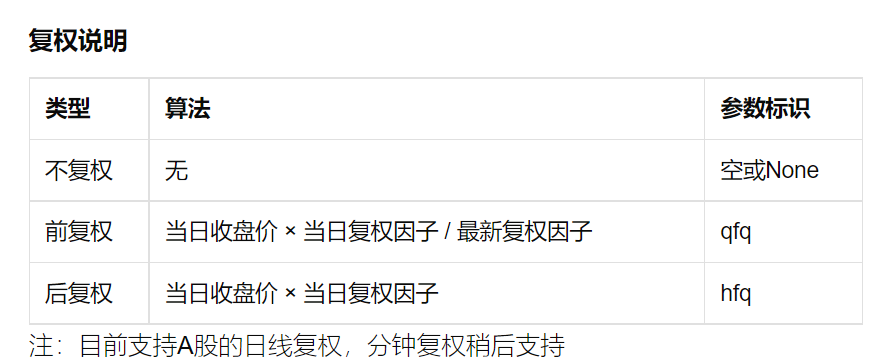

In [16]:
stock_codes = []
with open("./data/stock_codes_1931.txt", 'r') as f:
    for line in f:
        code = line.strip()  # .split('.')[0]
        stock_codes.append(code)
print(len(stock_codes))

1931


In [17]:
for i, code in enumerate(stock_codes):
    # tmp = pro.daily(ts_code=code, start_date='20100101', end_date='20191231')
    # adj='qfq' / 'hfq' 日线前复权/后复权, None是无复权
    try:
        if i<400:
            continue
        tmp = ts.pro_bar(ts_code=code, adj='hfq', start_date='20091120', end_date='20200110', ma=[5,10,20,30])
        tmp.to_csv(f'./data/hfq_price/{code}.csv', index=None)
        # 不是每支股票都正好有2431条数据
        if i==0:
            print(tmp.columns)
        if i%200==0:  print(f'./data/hfq_price/{code}.csv')
    except:
        print("error", i, code)

./data/hfq_price/000931.SZ.csv
./data/hfq_price/600182.SH.csv
./data/hfq_price/600425.SH.csv
./data/hfq_price/600678.SH.csv
./data/hfq_price/600901.SH.csv
./data/hfq_price/601866.SH.csv
./data/hfq_price/603303.SH.csv
./data/hfq_price/603739.SH.csv


# 待补充
-  全部股票每日基本面指标，是收盘后算的，用来预测下一天，日期需要错位

## 问题
- 数据过于稀疏怎么办，如一年或者一季度才有：
    - ffil
    - 输入会变成 xxxxyyyyyyy
    
- 分红送股数据（一年可能只有一次？）、财务指标数据（一季度才变一次？）、业绩快报和业绩预告
- 回购股票，股东人数、股权质押、限售股解禁（如定增）、融资融券交易明细

- 大宗交易/龙虎榜机构交易明细、股东增减持、前十大流通股东


**静态图的缺点：**
- 数据泄露，如某种分类今天才有，如三年前没有5G这个板块（**导致概念板块数据很难用怎么办**）
- 对比：同样模型结构，若dynamic比static好（只有每天的图不同），说明图结构变化对结果有负面影响，该做对应修改
- 若dynamic和static用不同模型结构，比如dynamic多一层时序，则dynamic更好

**hyperbolic不一定需要**
- 画一下邻居节点数有x的节点数y
- 对太密集的概念过滤，或者改成异构图后，是否就不需要hyperbolic了？

**工作顺序**
1. 还有太多论文没看，先精度几篇ref
    - 再找几个baseline跑一下 
2. MLP -> LSTM -> LSTM+GNN -> LSTM+GNN+LSTM 这几组基础的baseline
    - DGL改到pyg，改一下建图的代码，先建单张图（**每天一张图如何动态建？？**）
    - 把其他几种指标的算法加上（排序、分类），实际收益率已知当做reg label
3. 建图方式：
    - 全连接，异构图，（边权重）
    - 概念板块、大宗/龙虎榜机构交易，（基金持仓）
4. 另类数据
    - 待定

# 概念股分类

In [79]:
concepts = pro.concept()

In [80]:
print(concepts.shape, concepts.columns)
concepts.to_csv("./data/concept_list.csv", index=False)
concepts.head()  # 879个概念

(879, 3) Index(['code', 'name', 'src'], dtype='object')


,code,name,src
0,TS0,鼠疫,ts
1,TS1,黑龙江自贸区,ts
2,TS2,黑洞概念,ts
3,TS3,黄金水道,ts
4,TS4,黄金概念,ts


In [104]:
import time

concept_list = concepts['code'].values.tolist()
for i, concept in enumerate(concept_list):
    for j in range(3):  # max retries
        try:
            if i==0:
                df = pro.concept_detail(id=concept, fields='id,concept_name,ts_code,name,in_date,out_date')
            else:
                df2 = pro.concept_detail(id=concept, fields='id,concept_name,ts_code,name,in_date,out_date')
                if len(df2)>100: 
                    print(df2['id'][0], df2['concept_name'][0], len(df2))
                df = df.append(df2,ignore_index=True)
        except:
            print("exceed 200 times per minute!")
            time.sleep(60)
            continue
        break
print(df.shape)
df.to_csv("./data/concept_stocks.csv", index=False)

'''
TS108 转融券标的 1000
TS133 证金持股 120
TS143 融资融券 1000

TS145 融资标的股 1000
TS147 融券标的股 1000
TS186 股权转让 364
TS236 科创次新股 145
TS316 独角兽概念 180
TS354 深股通 885
TS379 注册制次新股 77
TS392 沪股通 586
TS393 沪台通 10

TS425 核准制次新股 193
TS426 标普道琼斯A股 1000
TS436 机构重仓 277
TS476 新股与次新股 415
TS485 新兴板概念 5
TS486 新三板精选层概念 17

TS537 年报预增 587
TS609 地方国资改革 720

TS652 参股新股 11
TS653 参股新三板 153
TS691 创业板重组松绑 180
TS714 养老金持股 104

TS860 MSCI概念 545
'''

TS1 黑龙江自贸区 39
TS2 黑洞概念 10
TS3 黄金水道 8
TS4 黄金概念 54
TS5 黄光裕概念 3
TS6 鸡尾酒 3
TS7 魔兽概念 4
TS8 高铁 68
TS9 高送转预期 116
TS10 高送转 1
TS11 高考 8
TS12 高端装备 126
TS13 高校 28
TS14 高性能膜 15
TS15 高岭土概念 4
TS16 骨传导 5
TS17 驾驶培训 3
TS18 首都副中心 4
TS19 首发新股 24
TS20 饲料 36
TS21 食盐 8
TS22 食用油 7
TS23 食品安全 32
TS24 飞机租赁 2
TS25 风电 111
TS26 风沙治理 7
TS27 预警机 10
TS28 页岩气 38
TS29 音乐产业 10
TS30 靶材 5
TS31 面粉 2
TS32 青蒿素 11
TS33 青岛自贸区 12
TS34 雷达 22
TS35 集成电路概念 132
TS36 雄安金融 13
TS37 雄安软件 4
TS38 雄安环保 20
TS39 雄安基建 27
TS40 雄安地热 5
TS41 雄安地产 11
TS42 雄安交通 9
TS43 陶瓷电容 6
TS44 陶瓷产品 5
TS45 除雪概念 3
TS46 陕西自贸区 9
TS47 际华系 2
TS48 阿里巴巴概念 94
TS49 阿糖胞苷 4
TS50 阿尔茨海默概念 9
TS51 阅兵 34
TS52 长江经济带 21
TS53 长三角一体化 82
TS54 镍氢电池 6
TS55 锦纶 8
TS56 锌电池 9
TS57 锌 17
TS58 锂电隔膜 15
TS59 锂电设备 20
TS60 锂电原料 26
TS61 锂电制造 33
TS62 银屑病 7
TS63 铬铁 2
TS64 铟 8
TS65 铝电解电容 6
TS66 铜冶炼 10
TS67 铜 24
TS68 铅 6
TS69 铁路混改 6
TS70 铁路基建 36
TS71 铁矿石 26
TS72 钼 12
TS73 钴 29
TS74 钨 11
TS75 钢结构 16
TS76 钠离子电池 4
TS77 钛白粉 13
TS78 钛 8
TS79 钒电池 4
TS80 钒涨价 3
TS81 钌催化剂 3
TS82 金融IC 26
TS83 金改 57
TS84 金控平台 10

In [103]:
df2 = pro.concept_detail(id='TS108', fields='id,concept_name,ts_code,name,in_date,out_date')
print(df2['id'][0], df2['concept_name'][0], len(df2))
df2.head()

TS108 转融券标的 1000


,id,concept_name,ts_code,name,in_date,out_date
0,TS108,转融券标的,000001.SZ,平安银行,20210205,None
1,TS108,转融券标的,000002.SZ,万科A,20210205,None
2,TS108,转融券标的,000006.SZ,深振业A,20210205,None
3,TS108,转融券标的,000008.SZ,神州高铁,20210205,None
4,TS108,转融券标的,000009.SZ,中国宝安,20210205,None


In [13]:
concept_stocks = pd.read_csv("./data/concept_stocks.csv")  # (34444, 6)
print(concept_stocks.shape, concept_stocks.columns, concept_stocks.tail())

(34444, 6) Index(['id', 'concept_name', 'ts_code', 'name', 'in_date', 'out_date'], dtype='object')           id concept_name    ts_code  name   in_date  out_date
34439  TS879         3D打印  603112.SH  华翔股份  20210205       NaN
34440  TS879         3D打印  603928.SH  兴业股份  20210205       NaN
34441  TS879         3D打印  603977.SH  国泰集团  20210205       NaN
34442  TS879         3D打印  605376.SH  博迁新材  20210205       NaN
34443  TS879         3D打印  688333.SH   铂力特  20210205       NaN


In [20]:
# 过滤概念板块
concept_groups = concept_stocks.groupby("concept_name", as_index=False)  # 873 groups, indexed from 0 to 879
print(len(concept_groups))
#for name, group in concept_groups:
#    if len(group) > 223 or len(group)<=2:
#        print(name, len(group))
concept_groups = concept_groups.filter(lambda x: len(x)<=223 and len(x)>=3)
print(len(concept_groups), len(concept_groups.groupby("id")))  # .get_group("TS0")
concept_groups.to_csv("./data/concept_stocks_filtered_223_3.csv", index=False)  # 23928, 824
# {name:gdf for name,gdf in df.groupby('Declarer') if len(gdf) >= 5}

873
23928 824


In [25]:
# 建图
#  edge_index: [2, num_edges] 
def get_rind_map(indsty):
	groups = pd.read_csv(indsty).groupby('id', as_index=False)
	rind_map = {id: group["ts_code"].values.tolist() for id, group in groups}
	return rind_map


def set_edge(mat, stocks, stock_id_map):
	# stock-stock edges
	for i in range(len(stocks)):
		for j in range(i+1, len(stocks)):
			s = stock_id_map.get(stocks[i], -1)
			e = stock_id_map.get(stocks[j], -1)
			if s==-1 or e==-1: continue
			mat[s,e] = mat[e,s] = 1


def set_heteredge(idx, mat, stocks, stock_id_map):
	# stock-industry edges
	e = idx + len(stock_id_map)
	for i in range(len(stocks)):
		s = stock_id_map.get(stocks[i], -1)
		if s==-1 or e==-1: continue
		mat[s,e] = mat[e,s] = 1


def build_hetergraph(indsty, return_adj, stock_id_map):
	snode_nums = len(stock_id_map)
	rind_map = get_rind_map(indsty)

	mat = torch.eye(snode_nums+len(rind_map.keys()))  # add self loop

	for i, (ind, stocks) in enumerate(rind_map.items()):
		set_heteredge(i, mat, stocks, stock_id_map)
		
	edge = mat.nonzero()
	return snode_nums, snode_nums+len(rind_map.keys()), mat if return_adj == True else edge.transpose(0, 1)


def build_graph(indsty, return_adj, stock_id_map):
	node_nums = len(stock_id_map)
	rind_map = get_rind_map(indsty)

	mat = torch.eye(node_nums)  # add self loop

	for ind, stocks in rind_map.items():
		set_edge(mat, stocks, stock_id_map)
		
	edge = mat.nonzero()
	return mat if return_adj == True else edge.transpose(0, 1)
	

stock_list_path = "./data/stock_codes_1931.txt"
stock_id_map = get_stock_id_mapping(stock_list_path)
adj = build_graph("./data/concept_stocks_filtered_223_3.csv", True, stock_id_map)

torch.Size([293354, 2])


In [26]:
print(adj.shape)

torch.Size([1931, 1931])


In [40]:
np.save("./data/concepts_graph_1931_233_3.npy", adj.data)

0.07867331802708728


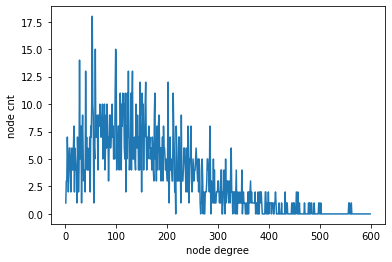

In [39]:
# 给定0-1邻接矩阵，画图，x是node degree, y是节点数目/比例
from matplotlib import pyplot as plt

adj = adj - adj.diag()  # remove self-loop
degree_cnt = [0 for i in range(len(adj))]
edges = 0
for i in range(len(adj)):
    d = int(sum(adj[i]))
    edges += d
    degree_cnt[d] += 1

print(edges / (len(adj)**2))
plt.plot([i for i in range(1, 600)], degree_cnt[1:600])  # x, y
plt.xlabel("node degree")
plt.ylabel("node cnt")
plt.show()

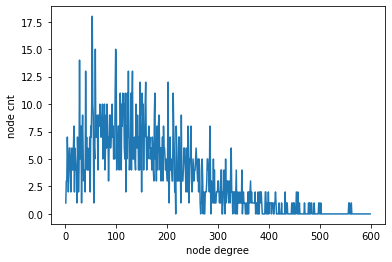

In [37]:
plt.plot([i for i in range(1, 600)], degree_cnt[1:600])  # x, y
plt.xlabel("node degree")
plt.ylabel("node cnt")
plt.show()

In [35]:
print(degree_cnt[:600])

[56, 1, 3, 3, 7, 5, 2, 4, 6, 6, 4, 2, 5, 6, 4, 4, 6, 8, 2, 6, 5, 4, 4, 1, 7, 5, 2, 4, 14, 5, 6, 8, 1, 7, 9, 6, 3, 4, 4, 2, 13, 5, 7, 4, 6, 4, 5, 4, 7, 2, 8, 7, 10, 18, 10, 9, 1, 6, 5, 15, 7, 7, 7, 9, 4, 8, 9, 8, 10, 9, 7, 7, 8, 10, 5, 8, 7, 10, 4, 6, 9, 6, 10, 7, 7, 3, 6, 9, 9, 6, 7, 7, 10, 7, 8, 5, 7, 5, 11, 15, 14, 4, 7, 6, 8, 8, 4, 7, 11, 8, 4, 10, 8, 11, 10, 10, 6, 5, 11, 2, 8, 5, 11, 7, 13, 7, 4, 5, 6, 11, 4, 10, 13, 5, 6, 5, 7, 5, 4, 10, 7, 6, 9, 7, 4, 7, 4, 12, 5, 8, 2, 11, 9, 10, 4, 8, 7, 10, 12, 7, 4, 7, 5, 6, 8, 6, 7, 5, 6, 6, 4, 7, 6, 4, 3, 9, 11, 5, 6, 3, 8, 6, 4, 8, 9, 7, 4, 6, 3, 6, 5, 7, 3, 8, 6, 6, 5, 4, 5, 4, 3, 5, 12, 3, 1, 5, 7, 4, 5, 4, 3, 3, 11, 8, 6, 2, 3, 0, 8, 6, 3, 3, 3, 7, 7, 3, 5, 1, 9, 3, 3, 3, 4, 6, 6, 5, 4, 2, 6, 5, 2, 8, 7, 1, 4, 5, 5, 8, 3, 2, 3, 5, 4, 3, 4, 4, 5, 6, 5, 4, 3, 5, 2, 5, 4, 1, 0, 1, 1, 5, 3, 0, 2, 1, 0, 2, 2, 2, 3, 5, 5, 4, 4, 2, 8, 5, 0, 3, 2, 2, 1, 5, 1, 4, 1, 1, 1, 2, 2, 2, 3, 3, 2, 1, 2, 1, 4, 4, 0, 0, 2, 2, 4, 1, 0, 5, 1, 2, 3, 3, 2, 1

# 计算mask和股价
##### mask
- mask维度是天数\*股票数\*1，初始值是全0
- 股票上市之前，和退市之后，都mask掉（我们已经把退市的删掉了，所以没有这种情况）
- 若这一天没有股价信息（停牌，或者还未上市），则不预测这一天的，前一天和后一天的都可以预测，相当于直接跳过去
- mask也是平移后的！和label一起平移的！

##### 股价
- 头几天的moving avg是空值，用当天价格填充
- 若中间出现交易日没有价格（如某股票停牌），则用前一天的价格和收益率等值填充，不预测这一天的价格
- 收益率往后平移一天，当做label，用x天的收盘价，预测x到x+1天的收益率，注意日期列表对应的是收盘价的日期，也就是x，原始数据的收益率是x-1天到x天的收益率，因此需要挪一位，可以在这里挪，也可以在dataset里面实现
- 这样会导致最后一天没有收益率（暂时丢掉?）

In [16]:
num_days = 2431 + 1  # 为了让最后一天有label，需要知道最后一天后面一天的收盘价，所以多一天
num_stocks = 1931  # or 1271
stock_list_path = "./data/stock_codes_1931.txt"
date_list_path = "./data/trading_opendays_2432.txt"
mask = np.zeros((num_days, num_stocks))
prices = np.zeros((num_days, num_stocks, 12))

In [17]:
stock_id_map = get_stock_id_mapping(stock_list_path)
days_id_map = get_days_id_mapping(date_list_path)

In [18]:
s_list = pd.read_csv("./data/stock_main_list_2139_9.csv")
print(s_list.shape)
s_list.head()

(2139, 10)


,Unnamed: 0,ts_code,symbol,name,area,industry,exchange,list_status,list_date,delist_date
0,0,000001.SZ,1,平安银行,深圳,银行,SZSE,L,19910403,NaN
1,1,000002.SZ,2,万科A,深圳,全国地产,SZSE,L,19910129,NaN
2,2,000004.SZ,4,国华网安,深圳,软件服务,SZSE,L,19910114,NaN
3,3,000005.SZ,5,ST星源,深圳,环境保护,SZSE,L,19901210,NaN
4,4,000006.SZ,6,深振业A,深圳,区域地产,SZSE,L,19920427,NaN


In [37]:
# ma 前几个数据是nan，补上
# 应该合并到后面算价格和mask的大循环里面
for idx,row in s_list.iterrows():
    stock_id = stock_id_map.get(row['ts_code'], -1)
    if stock_id == -1:
        continue
    
    cur_prices = pd.read_csv('./data/hfq_price/'+str(row['ts_code'])+'.csv')
    fill_ma_nan(cur_prices)
    cur_prices.to_csv('./data/hfq_price/'+str(row['ts_code'])+'.csv')
    
    if idx%200==0:
        print("idx=", idx)

idx= 0
idx= 200
idx= 400
idx= 600
idx= 800
idx= 1000
idx= 1200
idx= 1400
idx= 1800
idx= 2000


In [20]:
for idx,row in s_list.iterrows():
    stock_id = stock_id_map.get(row['ts_code'], -1)
    if stock_id == -1:
        continue
    '''
    list_id = 0  # [list_date, delist_date]
    if str(row['list_date']) > '20100101' and str(row['list_date']) <= '20191231':  # 上市在数据集期间
        list_date = str(row['list_date'])
        list_id = days_id_map.get(list_date, 0)
        while list_id == 0 and list_date < '20191231':
            list_date = increment_date(list_date, 1)
            list_id = days_id_map.get(list_date, 0)
            
    mask[list_id:, stock_id].fill(1.0)  # # [list_date, delist_date]
    '''

    cur_prices = pd.read_csv('./data/hfq_price/'+str(row['ts_code'])+'.csv')
    
    # fill moving average leading nan
    fill_ma_nan(cur_prices)  
    normaliza_cols = ['open','high','low','close','vol','ma5','ma10','ma20','ma30']
    # normalize: x/x.max()
    for col in normaliza_cols:
        cur_prices[col] = cur_prices[col] / cur_prices[col].max()

    for iidx, rrow in cur_prices.iterrows():
        trade_date_id = days_id_map.get(str(rrow['trade_date']), -1)
        if trade_date_id == -1:
            continue
        mask[trade_date_id, stock_id] = 1 # 这一天有收盘价，因此可以预测这一天的价格
        prices[trade_date_id, stock_id] = rrow[['pre_close','change',
                                                'pct_chg','open','high',
                                                'low','close','vol',
                                                'ma5','ma10','ma20','ma30']].values

    print(stock_id, row['ts_code'], mask[:, stock_id].sum())

0 000001.SZ 2362.0
1 000002.SZ 2277.0
2 000004.SZ 2184.0
3 000005.SZ 2091.0
4 000006.SZ 2307.0
5 000007.SZ 1825.0
6 000008.SZ 2111.0
7 000009.SZ 2322.0
8 000010.SZ 1675.0
9 000011.SZ 2405.0
10 000012.SZ 2387.0
11 000014.SZ 2426.0
12 000016.SZ 2338.0
13 000017.SZ 2056.0
14 000019.SZ 2196.0
15 000020.SZ 2134.0
16 000021.SZ 2401.0
17 000023.SZ 2139.0
18 000025.SZ 2398.0
19 000026.SZ 2418.0
20 000027.SZ 2382.0
21 000028.SZ 2305.0
22 000029.SZ 1624.0
23 000030.SZ 2098.0
24 000031.SZ 2238.0
25 000032.SZ 2159.0
26 000034.SZ 1816.0
27 000035.SZ 1632.0
28 000036.SZ 2379.0
29 000037.SZ 2142.0
30 000038.SZ 1205.0
31 000039.SZ 2400.0
32 000040.SZ 2242.0
33 000042.SZ 2222.0
34 000045.SZ 2249.0
35 000046.SZ 2342.0
36 000048.SZ 2242.0
37 000049.SZ 2393.0
38 000050.SZ 2222.0
39 000055.SZ 2402.0
40 000056.SZ 2253.0
41 000058.SZ 1982.0
42 000059.SZ 2308.0
43 000060.SZ 2411.0
44 000061.SZ 2317.0
45 000062.SZ 2311.0
46 000063.SZ 2346.0
47 000065.SZ 2302.0
48 000066.SZ 2192.0
49 000068.SZ 1940.0
50 000069.

In [22]:
print(np.count_nonzero(np.isnan(prices)))
print(prices.shape, mask.shape)

0
(2432, 1931, 12) (2432, 1931)


In [ ]:
'''
tmp = prices
tmp = tmp.reshape(tmp.shape[0], -1)
# tmp[tmp==0] = np.nan
m = np.isnan(tmp)
print("mask", m.shape)
pos = np.where(~m, np.expand_dims(np.arange(tmp.shape[0]), axis=1), 0)
print("pos", pos.shape)
np.maximum_accumulate(pos, axis=0, out=pos)
tmp[m] = tmp[pos[m], np.nonzero(m)[-1]]
print("tmp:", tmp.shape)
tmp = tmp.fillna(0).reshape((2305, 4096, -1))
'''

In [23]:
# np.save("./data/mask_2432_1931.npy", mask)
# np.save("./data/prices_2432_1931_12.npy", prices)

In [24]:
# prices = np.load("./data/prices_2431_1931_12.npy")
print(prices.shape, np.count_nonzero(prices)/(2431*1931*12), np.count_nonzero(np.isnan(prices))/(2431*1931*12))

(2432, 1931, 12) 0.7400999149102844 0.0


In [25]:
# forward fill nan
prices[prices==0] = np.nan
print(prices.shape, np.count_nonzero(np.isnan(prices))/(2431*1931*12))
for i in range(num_stocks):
    df = pd.DataFrame(prices[:, i, :])
    df = df.fillna(method='ffill')
    # print(df.shape, df.isna().sum().sum())
    prices[:, i, :] = df.fillna(0.0).copy().values
print(prices.shape, np.count_nonzero(np.isnan(prices))/(2431*1931*12))

(2432, 1931, 12) 0.2603114384422454
(2432, 1931, 12) 0.0


In [26]:
# 未上市的股票的nan都用0填充了
np.save("./data/prices_ffil_2432_1931_12.npy", prices)

In [15]:
prices_ffill = np.load("./data/prices_ffil_2432_1931_12.npy")
# label错开一位
prices_ffill[:, :, :3] = np.concatenate((prices_ffill[1:, :, :3], np.full((1, 1931, 3), np.nan)), axis=0)
mask = np.load("./data/mask_2432_1931.npy")
train_ffill, test_ffill = prices_ffill[:2305, :, :], prices_ffill[2305:-1, :, :]
print(train_ffill.shape, test_ffill.shape)

# 由于数据不符合正态分布，所以不能用stadardalization（N(0,1)）,，需要normalization
# min-max scaler放缩到[0,1]，能处理负数的情况
# x / x.max()适合当下场景，因为股价不会有负数，这样能保证放缩前后价格的percentage change不变，也就是预测label不变
# from sklearn.preprocessing import MinMaxScaler, StandardScaler
# scaler = StandardScaler()
# print(scaler)
# tmp_train = scaler.fit_transform(tmp_train.reshape(-1,tmp_train.shape[-1])).reshape(tmp_train.shape)
# tmp_valid = scaler.transform(tmp_valid.reshape(-1, tmp_valid.shape[-1])).reshape(tmp_valid.shape)

train_mask_ffill, test_mask_ffill = mask[:2305,:], mask[2305:-1, :]
print(train_mask_ffill.shape, test_mask_ffill.shape)

np.save("./data/train_2305_1931_12.npy", train_ffill)
np.save("./data/test_126_1931_12.npy", test_ffill)
np.save("./data/train_mask_2305_1931.npy", train_mask_ffill)
np.save("./data/test_mask_126_1931.npy", test_mask_ffill)

(2305, 1931, 12) (125, 1931, 12)
(2305, 1931) (125, 1931)


# 检查复权因子
- 看看有多少不为1

In [115]:
pro = ts.pro_api()

stock_id_map = get_stock_id_mapping("./data/stock_codes_2165.txt")
for x in stock_id_map.keys():
    df = pro.adj_factor(ts_code=x, start_date='20100101', end_date='20191231')
    print(df.shape, df['adj_factor'].value_counts(), df.head())
    # print(df['adj_factor'].agg(['nunique', 'count', 'size']))
    break
    

(2431, 3) 35.906     677
85.994     289
104.758    268
106.309    238
58.387     238
108.031    231
71.054     203
36.173     158
109.169    129
Name: adj_factor, dtype: int64      ts_code trade_date  adj_factor
0  000001.SZ   20191231     109.169
1  000001.SZ   20191230     109.169
2  000001.SZ   20191227     109.169
3  000001.SZ   20191226     109.169
4  000001.SZ   20191225     109.169


In [116]:
df = pro.adj_factor(ts_code='000001.SZ', start_date='20130618', end_date='20130621')
df

,ts_code,trade_date,adj_factor
0,000001.SZ,20130621,58.387
1,000001.SZ,20130620,58.387
2,000001.SZ,20130619,36.173
3,000001.SZ,20130618,36.173


In [147]:
#df = pro.adj_factor(ts_code='600068.SZ', start_date='20100101', end_date='20191231')
#df2 = ts.pro_bar(ts_code='000001.SZ', adj=None, start_date='20100101', end_date='20191231', ma=[5,10,20,30])
df2 = pro.daily(ts_code='001201.SZ', start_date='20100101')
df2.shape

(195, 11)

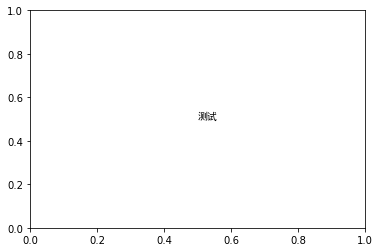

In [1]:
import matplotlib
from matplotlib import pyplot as plt
import matplotlib.font_manager as mfm

font_path = "../scp_zh/fonts/SimHei.ttf"
prop = mfm.FontProperties(fname=font_path)
plt.text(0.5, 0.5, s=u'测试', fontproperties=prop)
plt.show()

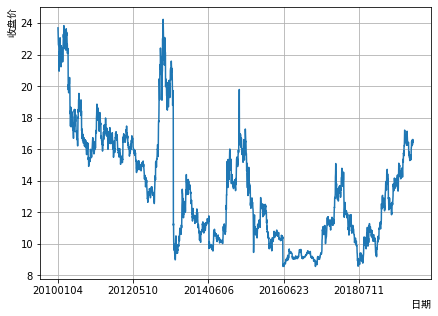

In [11]:
import matplotlib
from matplotlib import pyplot as plt
import matplotlib.font_manager as mfm

font_path = "../scp_zh/fonts/SimHei.ttf"
prop = mfm.FontProperties(fname=font_path)

# 平安银行
tmp = ts.pro_bar(ts_code='000001.SZ', adj=None, start_date='20100101', end_date='20191231', ma=[5,10,20,30])
tmp.sort_values(by=['trade_date'], inplace=True)
tmp.set_index(["trade_date"], inplace=True)
ax = tmp['close'].plot(figsize=(7,5), grid=True)
ax.set_xlabel("日期", fontproperties=prop)  # loc='right'
ax.set_ylabel("收盘价", fontproperties=prop)  #  loc='top'
ax.set_title("未复权收盘价", fontproperties=prop)
plt.savefig("./graphs/平安银行未复权")
plt.show()


<AxesSubplot:xlabel='date', ylabel='close price'>

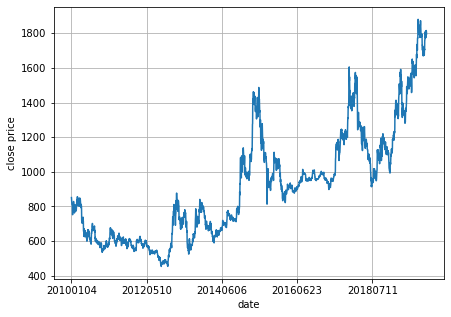

In [25]:
tmp = ts.pro_bar(ts_code='000001.SZ', adj='hfq', start_date='20100101', end_date='20191231', ma=[5,10,20,30])
tmp.sort_values(by=['trade_date'], inplace=True)
tmp.set_index(["trade_date"], inplace=True)
tmp['close'].plot(xlabel="date", ylabel="close price", figsize=(7,5), grid=True)


<AxesSubplot:xlabel='date', ylabel='close price'>

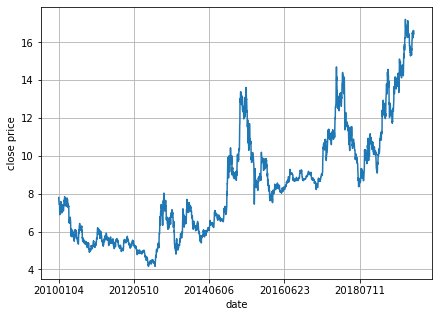

In [26]:
tmp = ts.pro_bar(ts_code='000001.SZ', adj='qfq', start_date='20100101', end_date='20191231', ma=[5,10,20,30])
tmp.sort_values(by=['trade_date'], inplace=True)
tmp.set_index(["trade_date"], inplace=True)
tmp['close'].plot(xlabel="date", ylabel="close price", figsize=(7,5), grid=True)


In [4]:
import torch
from torch_geometric.data import Data

print(torch.cuda.is_available())
edge_index = torch.tensor([[0, 1, 1, 2],
                           [1, 0, 2, 1]], dtype=torch.long)
x = torch.tensor([[-1], [0], [1]], dtype=torch.float)

data = Data(x=x, edge_index=edge_index)

data

False


Data(x=[3, 1], edge_index=[2, 4])